Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [2]:
# Your solution goes here
df= pd.read_csv("chicken.csv")
df.head()

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [3]:
# Your solution goes here
df_weight=df.groupby('diet')['weight'].describe()
df_weight

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [4]:
# Your solution goes here
df_eggs=df.groupby('diet')['eggs'].describe()
df_eggs

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

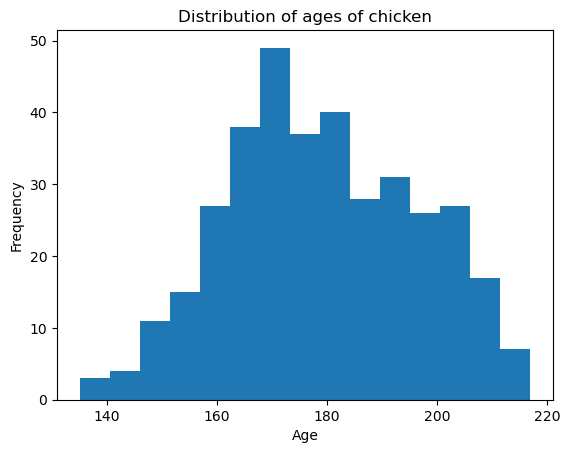

In [28]:
# Your solution goes here
df['age'].plot(kind='hist', title="Distribution of ages of chicken", bins=15);
plt.xlabel('Age');

### 3.2 Histogram of age of chickens (Seaborn distplot())

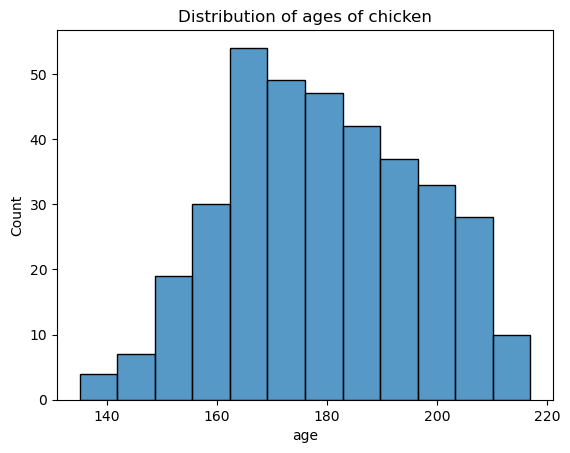

In [6]:
# Your solution goes here
sns.histplot(df['age'], kde=False).set(title ='Distribution of ages of chicken' );

### 4.1 Boxplot age (Pandas boxplot())

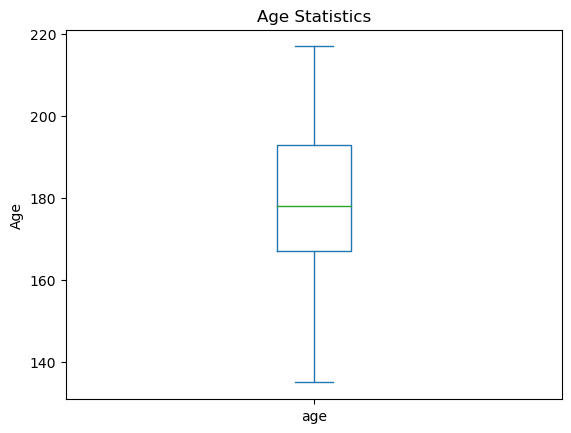

In [7]:
# Your solution goes here
df['age'].plot(kind='box', ylabel='Age', title='Age Statistics');

### 4.2 Boxplot age (Seaborn boxplot())

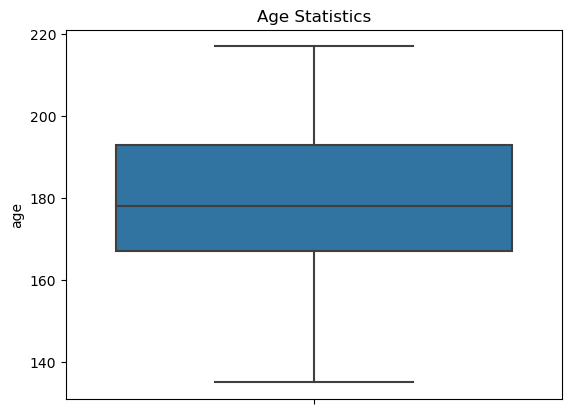

In [27]:
# Your solution goes here
sns.boxplot(y=df['age']).set(title ='Age Statistics' );

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

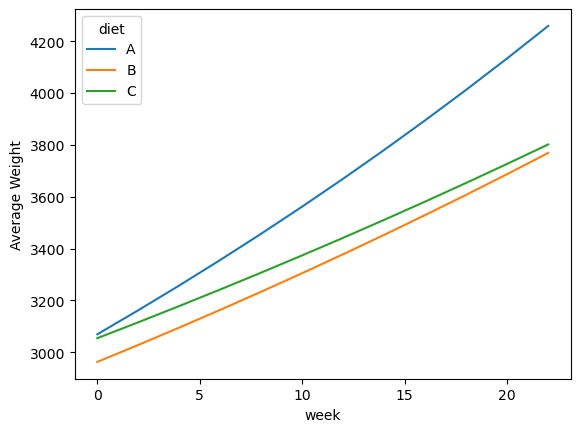

In [26]:
# Your solution goes here
# Your solution goes here
df.groupby(['week','diet']).mean()['weight'].unstack().plot(ylabel='Average Weight');

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

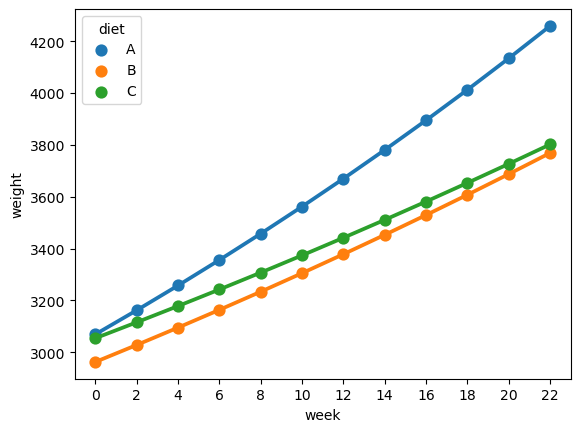

In [12]:
# Your solution goes here
#grouping the data
df1=df.groupby(['week','diet']).mean()['weight'].unstack()

#plotting the data
#ci isnt used because it is depreceated. errorbar=None used instead
sns.pointplot(data=df, x='week', y='weight', hue='diet',errorbar=None); #hue is used to categorise data

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

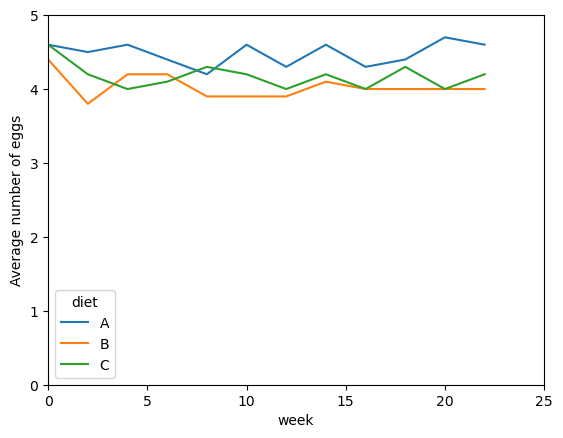

In [25]:
# Your solution goes here
df.groupby(['week','diet']).mean().eggs.unstack().plot(xlim=[0,25], ylim=[0,5], ylabel='Average number of eggs');

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

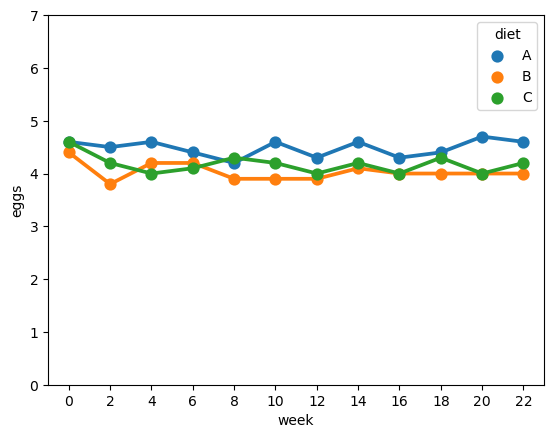

In [15]:
# Your solution goes here
ax1=sns.pointplot(data=df,x='week',y='eggs', hue='diet', errorbar=None) #hue is used to categorise data
ax1.set(ylim=(0,7)); #changing y axis to start from zero

### 7. Average age by diet stats (Pandas groupby())

In [16]:
# Your solution goes here
df.groupby('diet').age.mean()

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


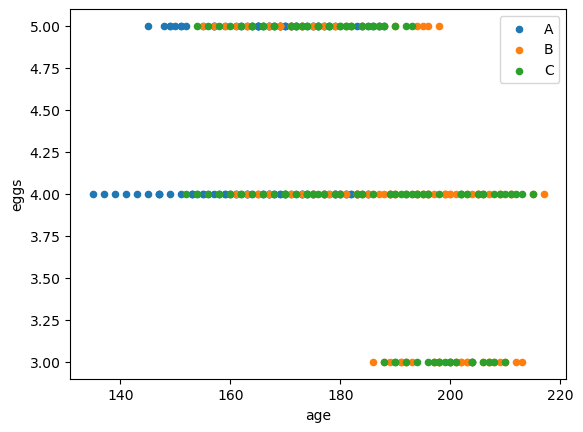

In [18]:
# Your solution goes here
#This code was adapted from the link provided above

fig, ax = plt.subplots()

#dictionary to set types for colors for diffferent diet
colors = {'A':'tab:blue', 'B':'tab:orange', 'C':'tab:green'}

grouped = df.groupby('diet')
#for loop to plot multiple figures(different diets) on the same plot
for key,group in grouped:
    group.plot(ax=ax, kind='scatter', x='age',y='eggs', label = key, color=colors[key])
plt.show()

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


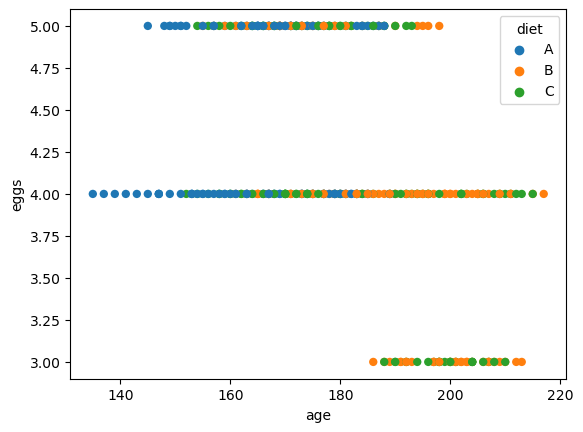

In [24]:
# Your solution goes here
#hue is used to categorise data
#ec is used to remove the transparency of the colors of the data points.
sns.scatterplot(x='age',y='eggs', data=df, hue='diet', ec=None); 

### 9.1 Boxplot age by diet (Pandas boxplot())

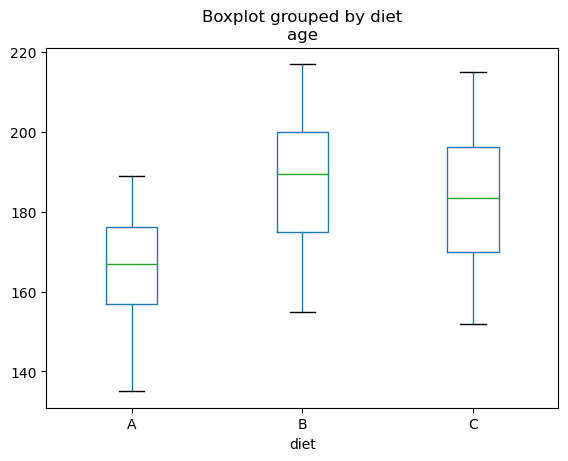

In [23]:
# Your solution goes here
df.boxplot(by='diet', column=['age'], grid=False);

### 9.2 Boxplot age by diet (Seaborn boxplot())

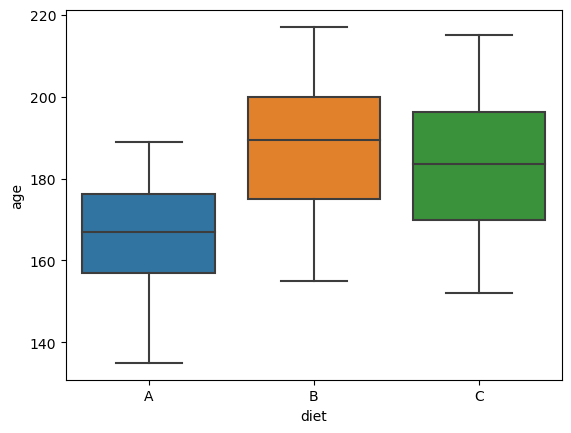

In [29]:
# Your solution goes here
sns.boxplot(x='diet', y='age', data=df);

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**








1. A strength of Pandas is the ability to quickly plot and visualize data using a dataframe datatype as seen using the plot function of the pandas library. However, it still requires matplotlib object to make certain modifications to the plot especially subplots (plot 8.1). This could be considered a weakness.

2. A major strength for Seaborn is the appearance of the plots. In the last boxplot above, seaborn inherently adds different colors to the boxplots. Seaborn also has a lot of themes and can be used to set themes that pandas/matplotlib figures are made on. This stylization by seaborn and its integration with matplotlib are key strenghts of the library and made it more popular for visualization compared to pandas. Seaborn also has a large variety of charts which can be easily generated. 

3. I would use Pandas for quick visualization to quickly observe trends and draw insights from data. However, for standard reports and presentation, I would use Seaborn for its better themes, appealing visualization and complex plots. Both libraries can also be combined by usig pandas for the plot ad Seaborn for the theme.